In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# base = Path('/Users/jasonkuruzovich/Library/CloudStorage/Box-Box/Documents/0_research/eship_vitor/I_CORPS/data/2024_617/NSF-Downloads-8july2024/')
base = Path('../Data')


df = pd.read_csv(base/'cleaned_long_xml_combined_08232024.csv')

/var/folders/51/gj2tp9pn4klb16gg85jd62zc0000gn/T/ipykernel_1417/1465406610.py:5: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,11,12,13,15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,38,39,40,42,43,44,45,49,50,52,53,54,56,57,58,60,61,63,64,65,66,67,68,69,70,71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base/'cleaned_long_xml_combined_08232024.csv')


In [3]:
# Identify investigator-related columns dynamically
investigator_columns = [col for col in df.columns if col.startswith('Investigator_')]

In [5]:
investigator_columns

['Investigator_FirstName',
 'Investigator_LastName',
 'Investigator_MiddleInitial',
 'Investigator_Suffix',
 'Investigator_FullName',
 'Investigator_Email',
 'Investigator_NSFID',
 'Investigator_StartDate',
 'Investigator_EndDate',
 'Investigator_RoleCode']

In [17]:
na_by_year.index

Index([        1959,         1961,         1962,         1963,         1964,
               1965,         1966,         1967,         1968,         1969,
               1970,         1971,         1972,         1973,         1974,
               1975,         1976,         1977,         1978,         1979,
               1980,         1981,         1982,         1983,         1984,
               1985,         1986,         1987,         1988,         1989,
               1990,         1991,         1992,         1993,         1994,
               1995,         1996,         1997,         1998,         1999,
               2000,         2001,         2002,         2003,         2004,
               2005,         2006,         2007,         2008,         2009,
               2010,         2011,         2012,         2013,         2014,
               2015,         2016,         2017,         2018,         2019,
               2020,         2021,         2022,         2023,         2024,

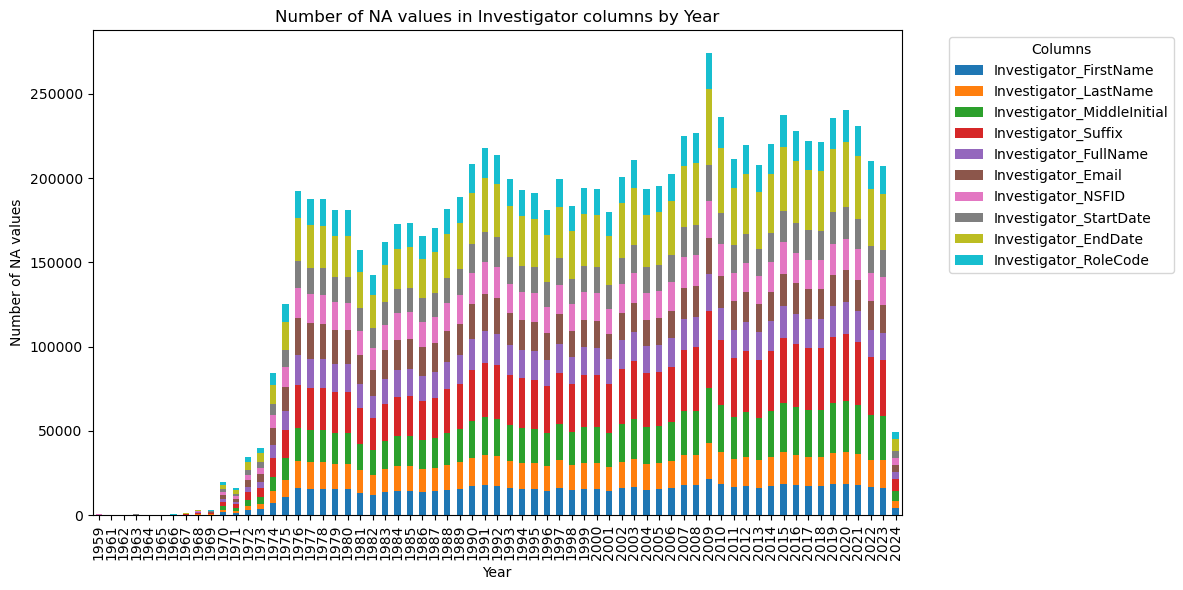

In [25]:
# Ensure 'Year' column is of string type
df['Year'] = df['Year'].astype(str)

# Calculate number of NA values by year for investigator columns and all columns
na_by_year = df.isna().groupby(df['Year']).sum()

# Drop the row where 'Year' is 'Historical'
na_by_year = na_by_year.drop('Historical', axis=0, errors='ignore')

# Save results to CSV files after dropping the 'Historical' row
na_by_year.to_csv('na_total_by_year.csv')
na_by_year[investigator_columns].to_csv('na_investigator_by_year.csv')


# Create individual graphs for better clarity
def plot_na_by_year(na_data, title, filename):
    na_data.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Number of NA values')
    plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  # Show the plot for debugging
    plt.close()

# Plot for investigator columns
plot_na_by_year(na_by_year[investigator_columns], 'Number of NA values in Investigator columns by Year', 'na_investigator_by_year.png')


In [29]:
# Ensure 'Year' column is of string type
df['Year'] = df['Year'].astype(str)

# Calculate number of NA values by year for investigator columns and all columns
na_by_year = df.isna().groupby(df['Year']).sum()

# Drop the row where 'Year' is 'Historical'
na_by_year = na_by_year.drop('Historical', axis=0, errors='ignore')

# Filter for investigator columns
na_investigator_by_year = na_by_year[investigator_columns]

# Calculate year-over-year percentage change
na_percentage_change = na_investigator_by_year.pct_change(axis='index') * 100

# Transpose the DataFrame
na_percentage_change_transposed = na_percentage_change.transpose()

pd.options.display.float_format = '{:.2f}'.format

na_percentage_change_transposed

Year,1959,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Investigator_FirstName,NaN,-77.78,125.00,85.19,-58.00,71.43,5.56,181.58,161.68,-6.79,557.47,-19.93,115.87,15.81,109.05,47.19,53.08,-2.48,0.06,-3.07,0.09,-13.10,-9.96,14.59,6.09,-0.37,-4.59,1.66,6.37,4.51,9.29,3.74,-1.54,-7.80,-3.80,-0.46,-5.51,11.62,-8.87,5.19,-0.19,-8.27,11.60,4.72,-8.66,1.08,4.37,11.08,-0.06,19.82,-12.54,-10.65,3.87,-5.50,5.82,7.61,-4.22,-2.96,-0.17,6.42,1.87,-3.52,-9.02,-1.10,-74.94
Investigator_LastName,NaN,-77.78,125.00,70.37,-65.22,125.00,2.78,170.27,168.00,-11.94,580.08,-20.50,118.65,16.99,113.88,48.86,54.21,-2.38,0.27,-2.89,0.34,-13.08,-9.95,14.54,6.11,-0.30,-4.54,1.66,6.43,4.47,9.31,3.79,-1.56,-7.78,-3.80,-0.46,-5.51,11.62,-8.87,5.19,-0.20,-8.27,11.60,4.72,-8.66,1.08,4.37,11.08,-0.06,19.82,-12.54,-10.65,3.87,-5.50,5.82,7.61,-4.22,-2.96,-0.17,6.42,1.87,-3.52,-9.02,-1.10,-74.94
Investigator_MiddleInitial,NaN,-75.36,141.18,43.90,-50.85,68.97,4.08,174.51,167.14,-9.36,547.20,-21.10,105.95,16.75,108.36,46.88,53.21,-2.33,-0.93,-3.00,-0.50,-12.53,-8.95,14.14,6.66,0.93,-4.27,2.71,7.36,4.13,10.67,4.80,-1.51,-5.81,-2.34,-0.42,-5.59,9.99,-7.17,5.65,0.95,-5.28,12.87,4.80,-7.50,1.46,4.28,12.51,1.39,22.98,-14.18,-9.81,4.57,-4.27,6.73,8.64,-3.37,-1.34,0.41,6.56,1.63,-4.04,-8.82,-1.03,-77.00
Investigator_Suffix,NaN,-77.78,127.78,80.49,-55.41,63.64,11.11,151.67,176.16,-5.52,557.11,-16.26,113.93,15.96,109.20,48.54,53.97,-2.28,0.07,-3.73,0.08,-12.76,-8.50,13.66,6.67,1.82,-3.41,3.98,7.77,4.32,11.25,6.41,-0.93,-5.44,-1.05,-1.84,-3.21,8.61,-6.47,8.34,-0.29,-5.07,11.24,5.43,-7.25,0.05,3.25,10.54,3.02,22.34,-15.15,-11.00,4.53,-5.37,5.28,7.93,-3.65,-2.28,-0.46,6.73,1.90,-4.76,-9.38,-2.91,-78.01
Investigator_FullName,NaN,-76.36,107.69,81.48,-55.10,77.27,-2.56,178.95,181.13,-13.42,585.27,-18.95,113.26,17.57,113.61,48.73,53.54,-2.64,-0.11,-3.16,0.12,-12.95,-9.83,14.16,6.35,0.10,-5.10,2.52,6.15,4.00,9.82,3.72,-2.38,-6.54,-4.29,0.62,-7.25,11.27,-8.97,3.74,-0.56,-8.45,11.59,4.47,-8.81,1.15,3.57,10.50,-0.94,18.86,-14.07,-10.66,3.87,-5.50,5.83,7.62,-4.23,-2.93,-0.20,6.42,1.87,-3.52,-9.02,-1.10,-74.94
Investigator_Email,NaN,-81.08,100.00,146.43,-59.42,57.14,22.73,127.78,172.36,3.88,570.40,-19.03,115.99,15.66,107.40,48.10,52.34,-2.64,-1.53,-4.61,-0.87,-14.71,-10.90,11.93,6.43,-0.51,-4.85,1.81,5.77,2.31,10.22,3.92,-3.95,-8.73,-6.63,-2.33,-9.08,9.49,-9.24,3.26,-1.26,-8.07,11.52,4.70,-8.44,1.18,4.16,10.74,0.27,18.45,-11.76,-10.58,3.80,-5.76,5.90,7.37,-4.11,-2.99,-0.95,6.50,2.04,-2.88,-9.18,-1.56,-74.51
Investigator_NSFID,NaN,-76.36,107.69,81.48,-55.10,77.27,-2.56,178.95,181.13,-13.42,585.27,-18.95,113.26,17.57,113.61,48.73,53.54,-2.64,-0.11,-3.16,0.12,-12.95,-9.83,14.16,6.35,0.10,-5.10,2.52,6.15,4.00,9.82,3.72,-2.38,-6.54,-4.29,0.62,-7.25,11.27,-8.97,3.74,-0.56,-8.45,11.59,4.47,-8.81,1.15,3.57,10.50,-0.94,18.86,-14.07,-10.67,3.88,-5.50,5.83,7.62,-4.23,-2.93,-0.20,6.44,1.87,-3.51,-9.02,-1.13,-74.94
Investigator_StartDate,NaN,-77.78,125.00,66.67,-64.44,125.00,2.78,170.27,168.00,-12.69,584.19,-20.74,119.54,17.12,113.61,49.04,54.26,-2.38,0.27,-2.90,0.35,-13.08,-9.95,14.54,6.11,-0.30,-4.54,1.68,6.41,4.47,9.31,3.79,-1.56,-7.78,-3.80,-0.46,-5.51,11.62,-8.86,5.19,-0.20,-8.27,11.60,4.73,-8.66,1.08,4.37,11.09,-0.02,19.79,-12.57,-10.64,3.85,-5.50,5.82,7.61,-4.22,-2.96,-0.17,6.42,1.87,-3.47,-9.04,-1.13,-74.94
Investigator_EndDate,NaN,-77.78,133.33,78.57,-56.00,63.64,11.11,155.00,172.55,-5.04,554.29,-16.06,114.21,16.16,109.13,48.49,54.23,-2.37,0.08,-3.64,0.20,-12.67,-8.49,13.62,6.65,1.80,-3.46,3.97,7.83,4.03,11.14,6.09,-1.28,-5.78,-1.33,-1.61,-3.36,8.53,-6.38,8.13,-0.33,-5.19,10.92,5.35,-7.46,0.04,3.01,10.47,2.98,22.06,-15.00,-11.07,4.45,-5.57,5.26,8.19,-3.99,-2.60,-0.81,7.07,2.20,-4.41,-8.47,-2.10,-77.87
Investigator_RoleCode,N

In [32]:
# Convert Investigator_NSFID to string to ensure consistent data type
df['Investigator_NSFID'] = df['Investigator_NSFID'].astype(str)

# Sort the DataFrame by Investigator_NSFID
df = df.sort_values(by='Investigator_NSFID')

In [33]:
print("Original DataFrame:")
df.head()

Original DataFrame:


,AwardID,InvestigatorNumber,Directorate_Abbreviation,CFDA_NUM,Institution_Phone,Institution_OrgUEINum,Division_LongName,AwardInstrument,Appropriation_Name,ProgramElement2_Code,Organization_Code,Institution_City,Appropriation_Code,ProgramOfficer_Name,Institution_State,Performance_Institution_CountryCode,MinAmdLetterDate,AwardAmount,Institution_CongressDistrictOrg,Agency,Year,Division_Abbreviation,Institution_OrgLglBusName,Institution_Country,Performance_Institution_CongressDistrictPerf,Institution_CongressDistrict,ProgramOfficer_Email,Performance_Institution_City,ProgramElement1_Code,ProgramElement3_Code,TRAN_TYPE,Performance_Institution_StreetAddress,AwardTotalIntnAmount,ProgramReference_Text,NSF_PAR_USE_FLAG,AwardExpirationDate,ARRAAmount,Appropriation_SymbolID,Performance_Institution_State,Fund_Obligation,AbstractNarration,Institution_Name,Fund_Name,Institution_StreetAddress2,ProgramElement1_Text,ProgramReference_Code,Performance_Institution_CountryFlag,AwardEffectiveDate,AwardTitle,MaxAmdLetterDate,Performance_Institution_Name,FUND_AGCY_CODE,Directorate_LongName,ProgramElement2_Text,Institution_StreetAddress1,ProgramOfficer_Phone,ProgramElement3_Text,Fund_Code,Performance_Institution_CongressDistrict,Fund_SymbolID,Performance_Institution_Zip,Institution_Zip,AWDG_AGCY_CODE,Performance_Institution_Country,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode
617845,343399,1,EHR,47.076,NaN,NaN,Division Of Graduate Education,Fellowship Award,"NSF, EDUCATION & HUMAN RESOURC",NaN,11010101.00,Oxford OX1 2JD UK,0403,Gisele Muller-Parker,NaN,UK,09/06/2003,117359.00,NaN,NSF,2003,DGE,NaN,United Kingdom,NaN,NaN,NaN,Oxford OX1 2JD UK,7172,NaN,Grant,NaN,39000.00,GRADUATE INVOLVEMENT,0.00,08/31/2008,NaN,490106.00,NaN,2003~39000,NaN,"Giansiracusa, Jeffrey H",NaN,NaN,Graduate Research Fellowship,9179,0.00,09/01/2003,GRADUATE RESEARCH FELLOWSHIPS,08/26/2005,"Giansiracusa, Jeffrey H",4900.00,Direct For Education and Human Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900.00,United Kingdom,Jeffrey,Giansiracusa,H,Mr.,Jeffrey H Giansiracusa,NaN,0.0,09/06/2003,NaN,Principal Investigator
49265,1500055,1,EDU,47.076,6517931884.00,RPHKMZZNJN93,Division Of Graduate Education,Standard Grant,NSF RESEARCH & RELATED ACTIVIT,NaN,11010001.00,SAINT PAUL,0115,Victor Piotrowski,Minnesota,US,08/21/2015,299943.00,MN04,NSF,2015,DGE,MINNESOTA STATE COLLEGES & UNIVERSITIES,United States,MN04,4.00,vpiotrow@nsf.gov,St.Paul,8060,NaN,Grant,700 E 7th Street,299943.00,CNCI,0.00,08/31/2020,NaN,40100.00,Minnesota,2015~299943,Creative educational and research programs nee...,Metropolitan State University,NSF RESEARCH & RELATED ACTIVIT,NaN,Secure &Trustworthy Cyberspace,7434,1.00,09/01/2015,SaTC-EDU: EAGER: CFEAR: Cyber Forensics Educat...,06/17/2019,Metropolitan State University,4900.00,Directorate for STEM Education,NaN,700 7TH ST E,7032925141.00,NaN,01001516DB,4.00,40100.00,551065000,551065003,4900.00,United States,Suzanne,Fitzgerald,C,NaN,Suzanne C Fitzgerald,NaN,0.0,08/21/2015,NaN,Co-Principal Investigator
14944,1433832,1,CSE,47.070,7737028669.00,ZUE9HKT2CLC9,Division Of Computer and Network Systems,Standard Grant,NSF RESEARCH & RELATED ACTIVIT,NaN,5050000.00,CHICAGO,0114,Janice Cuny,Illinois,US,04/10/2014,249843.00,IL01,NSF,2014,CNS,UNIVERSITY OF CHICAGO,United States,IL01,1.00,NaN,NaN,7382,NaN,Grant,NaN,249843.00,EAGER,0.00,12/31/2015,NaN,40100.00,Illinois,2014~249843,The University of Chicago proposes a project t...,University of Chicago,NSF RESEARCH & RELATED ACTIVIT,NaN,Computing Ed for 21st Century,7916,1.00,04/01/2014,EAGER: Leading Computer Science Growth: A Tool...,05/21/2014,University of Chicago,4900.00,Direct For Computer & Info Scie & Enginr,NaN,5801 S ELLIS AVE,NaN,NaN,01001415DB,1.00,40100.00,606372801,606375418,4900.00,United States,Michael,Lach,NaN,NaN,Michael Lach,NaN,0.0,05/21/2014,NaN,Co-

In [34]:
pd.set_option('display.max_rows', 200)

In [35]:
print(df.isnull().sum())

AwardID                                               0
InvestigatorNumber                                    0
Directorate_Abbreviation                         395661
CFDA_NUM                                         460953
Institution_Phone                                405114
Institution_OrgUEINum                            543855
Division_LongName                                352446
AwardInstrument                                  334872
Appropriation_Name                              1288737
ProgramElement2_Code                            1555026
Organization_Code                                334977
Institution_City                                 335934
Appropriation_Code                              1288098
ProgramOfficer_Name                              348267
Institution_State                                 14520
Performance_Institution_CountryCode              813225
MinAmdLetterDate                                   1635
AwardAmount                                     

In [40]:
# List of investigator columns
investigator_columns = [
    'Investigator_FirstName',
    'Investigator_LastName',
    'Investigator_MiddleInitial',
    'Investigator_Suffix',
    'Investigator_FullName',
    'Investigator_Email'
]

# Check for rows where all specified columns are NA
all_na_rows = df[investigator_columns].isna().all(axis=1)

# Count the number of such rows
all_na_count = all_na_rows.sum()
all_na_count

1143301

In [41]:
# List of investigator columns
investigator_columns = [
    'Investigator_FirstName',
    'Investigator_LastName',
    'Investigator_MiddleInitial',
    'Investigator_Suffix',
    'Investigator_FullName',
    'Investigator_Email'
]

# Function to count rows with all NA in specified columns for a given group
def count_all_na(group):
    return group[investigator_columns].isna().all(axis=1).sum()

# Group by InvestigatorNumber and apply the count_all_na function
na_count_by_investigator_number = df.groupby('InvestigatorNumber').apply(count_all_na)

print(na_count_by_investigator_number)

InvestigatorNumber
1    112778
2    467895
3    562628
dtype: int64


In [42]:
112778+467895+562628

1143301

In [1]:
112778/1143301

0.09864243974246502

In [2]:
467895/1143301

0.40924918284861117

In [3]:
562628/1143301

0.4921083774089238

In [6]:
# Get the unique Investigator_NSFID values
unique_investigator_nsfids = df['Investigator_NSFID'].unique()

print("Unique Investigator_NSFID values:")
unique_investigator_nsfids

Unique Investigator_NSFID values:


array([90165.0, 485992.0, 217717.0, ..., 210134.0, 172740.0, 175120.0],
      dtype=object)

In [37]:
len(unique_investigator_nsfids)

254510

In [38]:
df.shape

(1889712, 74)

In [39]:
# Get the count of each unique Investigator_NSFID value
nsfid_counts = df['Investigator_NSFID'].value_counts()

print("Count of each unique Investigator_NSFID value:")
nsfid_counts

Count of each unique Investigator_NSFID value:


nan          1183674
525500.0         457
206836.0         300
175214.0         193
109156.0         183
              ...   
000528983          1
317831.0           1
317833.0           1
000528949          1
000459031          1
Name: Investigator_NSFID, Length: 254510, dtype: int64

In [31]:
# Filter the DataFrame to get all records where Investigator_NSFID equals '0.0'
nsf_id_zero_df = df[df['Investigator_NSFID'] == '0.0']

print("Records where Investigator_NSFID is 0.0:")
nsf_id_zero_df

Records where Investigator_NSFID is 0.0:


,AwardID,InvestigatorNumber,Directorate_Abbreviation,CFDA_NUM,Institution_Phone,Institution_OrgUEINum,Division_LongName,AwardInstrument,Appropriation_Name,ProgramElement2_Code,Organization_Code,Institution_City,Appropriation_Code,ProgramOfficer_Name,Institution_State,Performance_Institution_CountryCode,MinAmdLetterDate,AwardAmount,Institution_CongressDistrictOrg,Agency,Year,Division_Abbreviation,Institution_OrgLglBusName,Institution_Country,Performance_Institution_CongressDistrictPerf,Institution_CongressDistrict,ProgramOfficer_Email,Performance_Institution_City,ProgramElement1_Code,ProgramElement3_Code,TRAN_TYPE,Performance_Institution_StreetAddress,AwardTotalIntnAmount,ProgramReference_Text,NSF_PAR_USE_FLAG,AwardExpirationDate,ARRAAmount,Appropriation_SymbolID,Performance_Institution_State,Fund_Obligation,AbstractNarration,Institution_Name,Fund_Name,Institution_StreetAddress2,ProgramElement1_Text,ProgramReference_Code,Performance_Institution_CountryFlag,AwardEffectiveDate,AwardTitle,MaxAmdLetterDate,Performance_Institution_Name,FUND_AGCY_CODE,Directorate_LongName,ProgramElement2_Text,Institution_StreetAddress1,ProgramOfficer_Phone,ProgramElement3_Text,Fund_Code,Performance_Institution_CongressDistrict,Fund_SymbolID,Performance_Institution_Zip,Institution_Zip,AWDG_AGCY_CODE,Performance_Institution_Country,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode,GrantType
617845,343399,1,EHR,47.076,NaN,NaN,Division Of Graduate Education,Fellowship Award,"NSF, EDUCATION & HUMAN RESOURC",NaN,11010101.0,Oxford OX1 2JD UK,0403,Gisele Muller-Parker,NaN,UK,09/06/2003,117359.0,NaN,NSF,2003,DGE,NaN,United Kingdom,NaN,NaN,NaN,Oxford OX1 2JD UK,7172,NaN,Grant,NaN,39000.0,GRADUATE INVOLVEMENT,0.0,08/31/2008,NaN,490106.0,NaN,2003~39000,NaN,"Giansiracusa, Jeffrey H",NaN,NaN,Graduate Research Fellowship,9179,0.0,09/01/2003,GRADUATE RESEARCH FELLOWSHIPS,08/26/2005,"Giansiracusa, Jeffrey H",4900.0,Direct For Education and Human Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900.0,United Kingdom,Jeffrey,Giansiracusa,H,Mr.,Jeffrey H Giansiracusa,NaN,0.0,09/06/2003,NaN,Principal Investigator,Other
49265,1500055,1,EDU,47.076,6517931884.0,RPHKMZZNJN93,Division Of Graduate Education,Standard Grant,NSF RESEARCH & RELATED ACTIVIT,NaN,11010001.0,SAINT PAUL,0115,Victor Piotrowski,Minnesota,US,08/21/2015,299943.0,MN04,NSF,2015,DGE,MINNESOTA STATE COLLEGES & UNIVERSITIES,United States,MN04,4.0,vpiotrow@nsf.gov,St.Paul,8060,NaN,Grant,700 E 7th Street,299943.0,CNCI,0.0,08/31/2020,NaN,40100.0,Minnesota,2015~299943,Creative educational and research programs nee...,Metropolitan State University,NSF RESEARCH & RELATED ACTIVIT,NaN,Secure &Trustworthy Cyberspace,7434,1.0,09/01/2015,SaTC-EDU: EAGER: CFEAR: Cyber Forensics Educat...,06/17/2019,Metropolitan State University,4900.0,Directorate for STEM Education,NaN,700 7TH ST E,7.032925e+09,NaN,01001516DB,4.0,40100.0,551065000,551065003,4900.0,United States,Suzanne,Fitzgerald,C,NaN,Suzanne C Fitzgerald,NaN,0.0,08/21/2015,NaN,Co-Principal Investigator,Other
14944,1433832,1,CSE,47.070,7737028669.0,ZUE9HKT2CLC9,Division Of Computer and Network Systems,Standard Grant,NSF RESEARCH & RELATED ACTIVIT,NaN,5050000.0,CHICAGO,0114,Janice Cuny,Illinois,US,04/10/2014,249843.0,IL01,NSF,2014,CNS,UNIVERSITY OF CHICAGO,United States,IL01,1.0,NaN,NaN,7382,NaN,Grant,NaN,249843.0,EAGER,0.0,12/31/2015,NaN,40100.0,Illinois,2014~249843,The University of Chicago proposes a project t...,University of Chicago,NSF RESEARCH & RELATED ACTIVIT,NaN,Computing Ed for 21st Century,7916,1.0,04/01/2014,EAGER: Leading Computer Science Growth: A Tool...,05/21/2014,University of Chicago,4900.0,Direct For Computer & Info Scie & Enginr,NaN,5801 S ELLIS AVE,NaN,NaN,01001415DB,1.0,40100.0,606372801,606375418,4900.0,United States,Michael,Lach,NaN,NaN,Michael Lach,NaN,0.0,05/21/2014,NaN,Co-Principal I

In [5]:
nsf_id_zero_df = df[df['Investigator_NSFID'] == '206836.0']

print("Records where Investigator_NSFID is 000000032:")
nsf_id_zero_df

Records where Investigator_NSFID is 000000032:


,AwardID,InvestigatorNumber,Directorate_Abbreviation,CFDA_NUM,Institution_Phone,Institution_OrgUEINum,Division_LongName,AwardInstrument,Appropriation_Name,ProgramElement2_Code,Organization_Code,Institution_City,Appropriation_Code,ProgramOfficer_Name,Institution_State,Performance_Institution_CountryCode,MinAmdLetterDate,AwardAmount,Institution_CongressDistrictOrg,Agency,Year,Division_Abbreviation,Institution_OrgLglBusName,Institution_Country,Performance_Institution_CongressDistrictPerf,Institution_CongressDistrict,ProgramOfficer_Email,Performance_Institution_City,ProgramElement1_Code,ProgramElement3_Code,TRAN_TYPE,Performance_Institution_StreetAddress,AwardTotalIntnAmount,ProgramReference_Text,NSF_PAR_USE_FLAG,AwardExpirationDate,ARRAAmount,Appropriation_SymbolID,Performance_Institution_State,Fund_Obligation,AbstractNarration,Institution_Name,Fund_Name,Institution_StreetAddress2,ProgramElement1_Text,ProgramReference_Code,Performance_Institution_CountryFlag,AwardEffectiveDate,AwardTitle,MaxAmdLetterDate,Performance_Institution_Name,FUND_AGCY_CODE,Directorate_LongName,ProgramElement2_Text,Institution_StreetAddress1,ProgramOfficer_Phone,ProgramElement3_Text,Fund_Code,Performance_Institution_CongressDistrict,Fund_SymbolID,Performance_Institution_Zip,Institution_Zip,AWDG_AGCY_CODE,Performance_Institution_Country,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode


### convert nsfid into int
## each unique nsfid and name (pair) consistent for diff (should not match for different people)

## drop historical data
### lowercase every full name before comparing


## column: in the end text1 for grant type/name CA
## 

In [4]:
df.shape

(1889712, 74)

In [5]:
df.columns

Index(['AwardID', 'InvestigatorNumber', 'Directorate_Abbreviation', 'CFDA_NUM',
       'Institution_Phone', 'Institution_OrgUEINum', 'Division_LongName',
       'AwardInstrument', 'Appropriation_Name', 'ProgramElement2_Code',
       'Organization_Code', 'Institution_City', 'Appropriation_Code',
       'ProgramOfficer_Name', 'Institution_State',
       'Performance_Institution_CountryCode', 'MinAmdLetterDate',
       'AwardAmount', 'Institution_CongressDistrictOrg', 'Agency', 'Year',
       'Division_Abbreviation', 'Institution_OrgLglBusName',
       'Institution_Country', 'Performance_Institution_CongressDistrictPerf',
       'Institution_CongressDistrict', 'ProgramOfficer_Email',
       'Performance_Institution_City', 'ProgramElement1_Code',
       'ProgramElement3_Code', 'TRAN_TYPE',
       'Performance_Institution_StreetAddress', 'AwardTotalIntnAmount',
       'ProgramReference_Text', 'NSF_PAR_USE_FLAG', 'AwardExpirationDate',
       'ARRAAmount', 'Appropriation_SymbolID', 'Performa

In [6]:
def label_grant_type(title):
    if pd.isna(title):
        return 'Unknown'
    elif 'Research' in title:
        return 'Research'
    elif 'I-Corps' in title:
        return 'I-Corps'
    elif 'SBIR' in title:
        return 'SBIR'
    elif 'STTR' in title:
        return 'STTR'
    else:
        return 'Other'

In [7]:
df['GrantType'] = df['AwardTitle'].apply(label_grant_type)

In [8]:
df['AwardTitle'].isnull().sum()

61647

In [9]:
df['GrantType'].value_counts()

Other       1416840
Research     366405
Unknown       61647
SBIR          31761
I-Corps        8379
STTR           4680
Name: GrantType, dtype: int64

In [10]:
columns_needed = ['Investigator_NSFID', 'AwardID', 'AwardEffectiveDate', 'Investigator_FirstName', 'Investigator_LastName', 'Institution_Name', 'AwardTitle', 'AbstractNarration', 'GrantType']
grant_connections_df = df[columns_needed].copy()

In [11]:
grant_connections_df.head()

,Investigator_NSFID,AwardID,AwardEffectiveDate,Investigator_FirstName,Investigator_LastName,Institution_Name,AwardTitle,AbstractNarration,GrantType
0,90165.0,1341657,04/01/2014,Lorenzo,Polvani,Columbia University,Stratospheric Ozone Depletion and Recovery and...,"Climate change in the Antarctic, along with it...",Other
1,485992.0,1339934,06/01/2014,Franco,Biondi,"Board of Regents, NSHE, obo University of Neva...",Collaborative Research: Extreme Events and Eco...,Forests are vital natural and economic resourc...,Research
2,217717.0,1318722,09/01/2013,Atul,Prakash,Regents of the University of Michigan - Ann Arbor,TWC: Small: Discovering and Restricting Undesi...,Loss of personal data or leakage of corporate ...,Other
3,435838.0,1317411,10/01/2013,Kang,Shin,Regents of the University of Michigan - Ann Arbor,NeTS: Small: Collaborative Research: Efficient...,Next-generation WLAN protocols will rely heavi...,Research
4,573019.0,1347226,06/15/2014,John,Stavig,University of Minnesota-Twin Cities,Minnesota I-Corps Site (MIN-Corps): Catalyzing...,This project supports an I-Corps Site at the U...,I-Corps


In [12]:
#Filter Data for Faculty with All Three Grant Types
grant_summary = grant_connections_df.groupby('Investigator_NSFID')['GrantType'].apply(lambda x: ','.join(sorted(set(x))))
filtered_persons = grant_summary[grant_summary.str.contains('I-Corps') & grant_summary.str.contains('SBIR') & grant_summary.str.contains('Research')].index
filtered_df = grant_connections_df[grant_connections_df['Investigator_NSFID'].isin(filtered_persons)]

In [13]:
filtered_df.head()

,Investigator_NSFID,AwardID,AwardEffectiveDate,Investigator_FirstName,Investigator_LastName,Institution_Name,AwardTitle,AbstractNarration,GrantType
3034,112695.0,1338877,08/01/2013,Jannick,Rolland,University of Rochester,I/UCRC: Collaborative Research: Center for Fr...,1338877 University of Rochester; Jannick Rolla...,Research
7160,288955.0,1314164,01/15/2013,Chandra,Krintz,University of California-Santa Barbara,I-Corps: AppScale -- Spurring Innovation Thro...,This work addresses what researchers believe a...,I-Corps
7346,336126.0,1359538,08/01/2014,Mark,Zondlo,Princeton University,EAGER: Collaborative Research: Development of ...,Nitrous oxide is the third most important gree...,Research
9734,751593.0,1334361,08/01/2013,Alice,Agogino,University of California-Berkeley,"Collaborative Research: TheDesignExchange, an ...",The objective of this collaborative research p...,Research
10265,290669.0,1305350,10/01/2013,Bahram,Nabet,Drexel University,II-NEW: Testbed for High Performance Interconn...,Increasing functionality and complexity of int...,Other


In [14]:
filtered_df.shape

(162, 9)

In [15]:
filtered_df.head()

,Investigator_NSFID,AwardID,AwardEffectiveDate,Investigator_FirstName,Investigator_LastName,Institution_Name,AwardTitle,AbstractNarration,GrantType
3034,112695.0,1338877,08/01/2013,Jannick,Rolland,University of Rochester,I/UCRC: Collaborative Research: Center for Fr...,1338877 University of Rochester; Jannick Rolla...,Research
7160,288955.0,1314164,01/15/2013,Chandra,Krintz,University of California-Santa Barbara,I-Corps: AppScale -- Spurring Innovation Thro...,This work addresses what researchers believe a...,I-Corps
7346,336126.0,1359538,08/01/2014,Mark,Zondlo,Princeton University,EAGER: Collaborative Research: Development of ...,Nitrous oxide is the third most important gree...,Research
9734,751593.0,1334361,08/01/2013,Alice,Agogino,University of California-Berkeley,"Collaborative Research: TheDesignExchange, an ...",The objective of this collaborative research p...,Research
10265,290669.0,1305350,10/01/2013,Bahram,Nabet,Drexel University,II-NEW: Testbed for High Performance Interconn...,Increasing functionality and complexity of int...,Other


In [16]:
filtered_df.head().values

array([[112695.0, 1338877, '08/01/2013', 'Jannick', 'Rolland',
        'University of Rochester',
        'I/UCRC:  Collaborative Research: Center for Freeform Optics',
        "1338877 University of Rochester; Jannick Rolland <br/>1338898 University of North Carolina at Charlotte; Angela Davies <br/><br/>The proposed Center for Freeform Optics (CeFO) aims to advance research and education on the science, engineering and applications of freeform optics through a dedicated, continuing industrial partnership. The research efforts will be anchored by the University of Rochester (UR) as the lead institution, partnered with the University of North Carolina at Charlotte (UNCC). <br/><br/>The proposed Center (CeFO) constitutes a unique research environment combining the strengths of two top-tier research universities with the experiences, insights, and needs of international industrial talent specialized in building systems supporting the manufacturing, integration, and implementation of adva

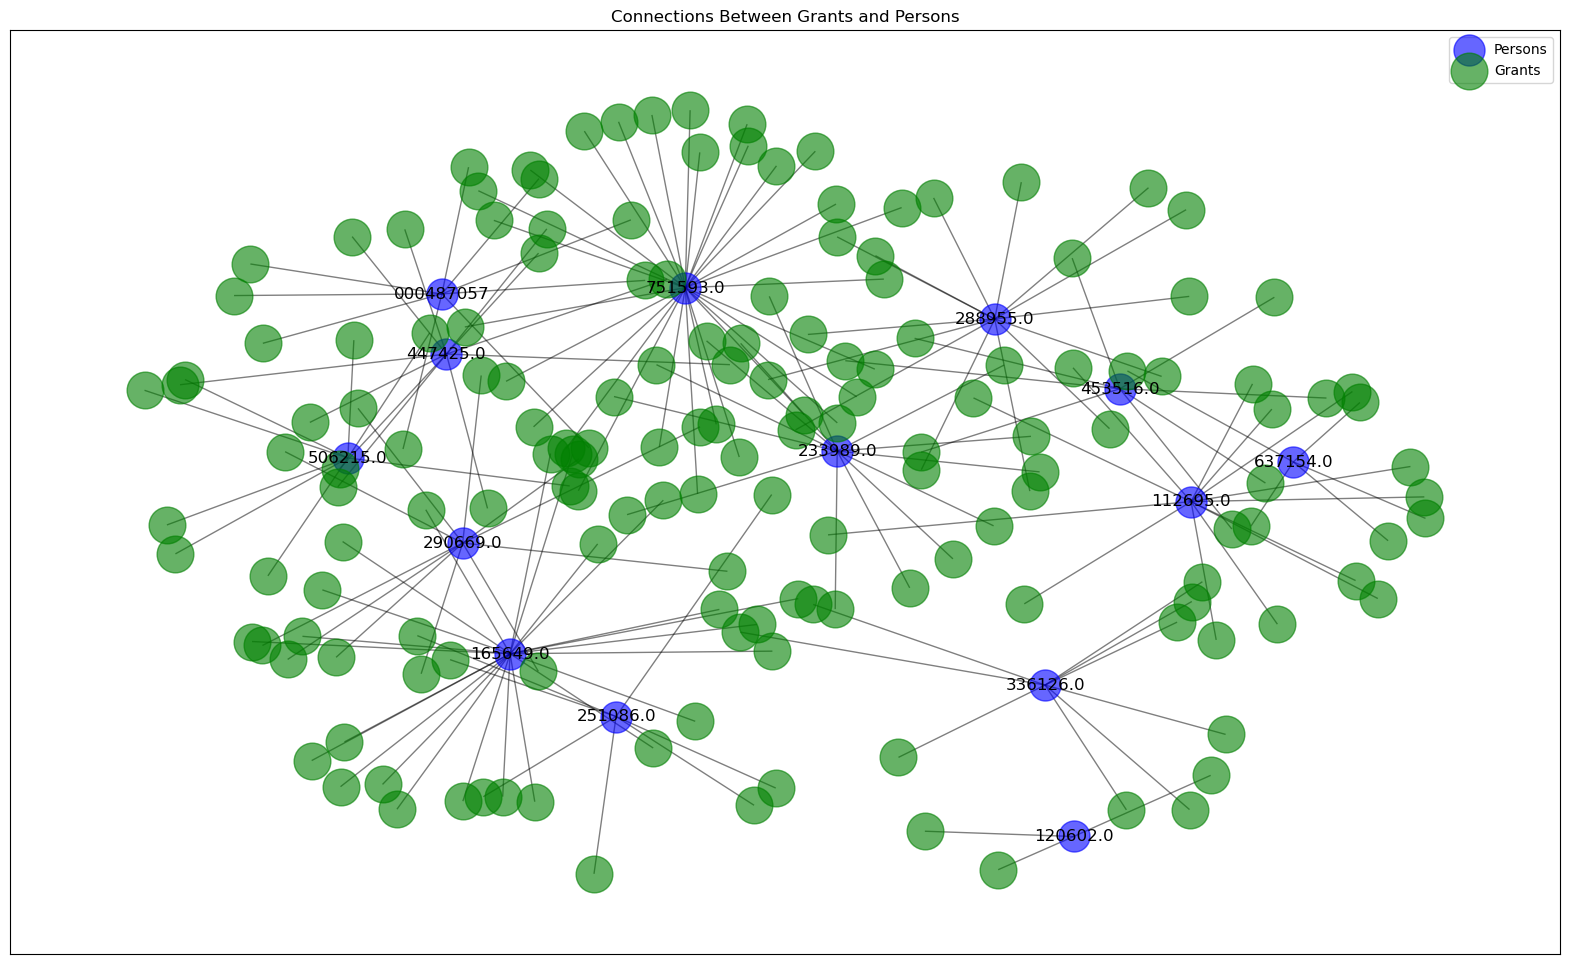

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes and edges
for _, row in filtered_df.iterrows():
    person_node = row['Investigator_NSFID']
    grant_node = row['AwardID']
    
    # Add nodes
    G.add_node(person_node, type='person', label=person_node)
    G.add_node(grant_node, type='grant', label=row['AwardTitle'], grant_type=row['GrantType'])
    
    # Add edge
    G.add_edge(person_node, grant_node)

# Draw the graph with better layout
pos = nx.spring_layout(G, k=0.3)  # Adjust the value of 'k' for better spacing
plt.figure(figsize=(20, 12))  # Increase figure size for better readability

person_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'person']
grant_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'grant']

nx.draw_networkx_nodes(G, pos, nodelist=person_nodes, node_color='blue', node_size=500, alpha=0.6, label='Persons')
nx.draw_networkx_nodes(G, pos, nodelist=grant_nodes, node_color='green', node_size=700, alpha=0.6, label='Grants')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Only show labels for persons
person_labels = {n: G.nodes[n]['label'] for n in person_nodes}
nx.draw_networkx_labels(G, pos, labels=person_labels, font_size=12, font_color='black')

plt.legend(scatterpoints=1)
plt.title("Connections Between Grants and Persons")
plt.show()

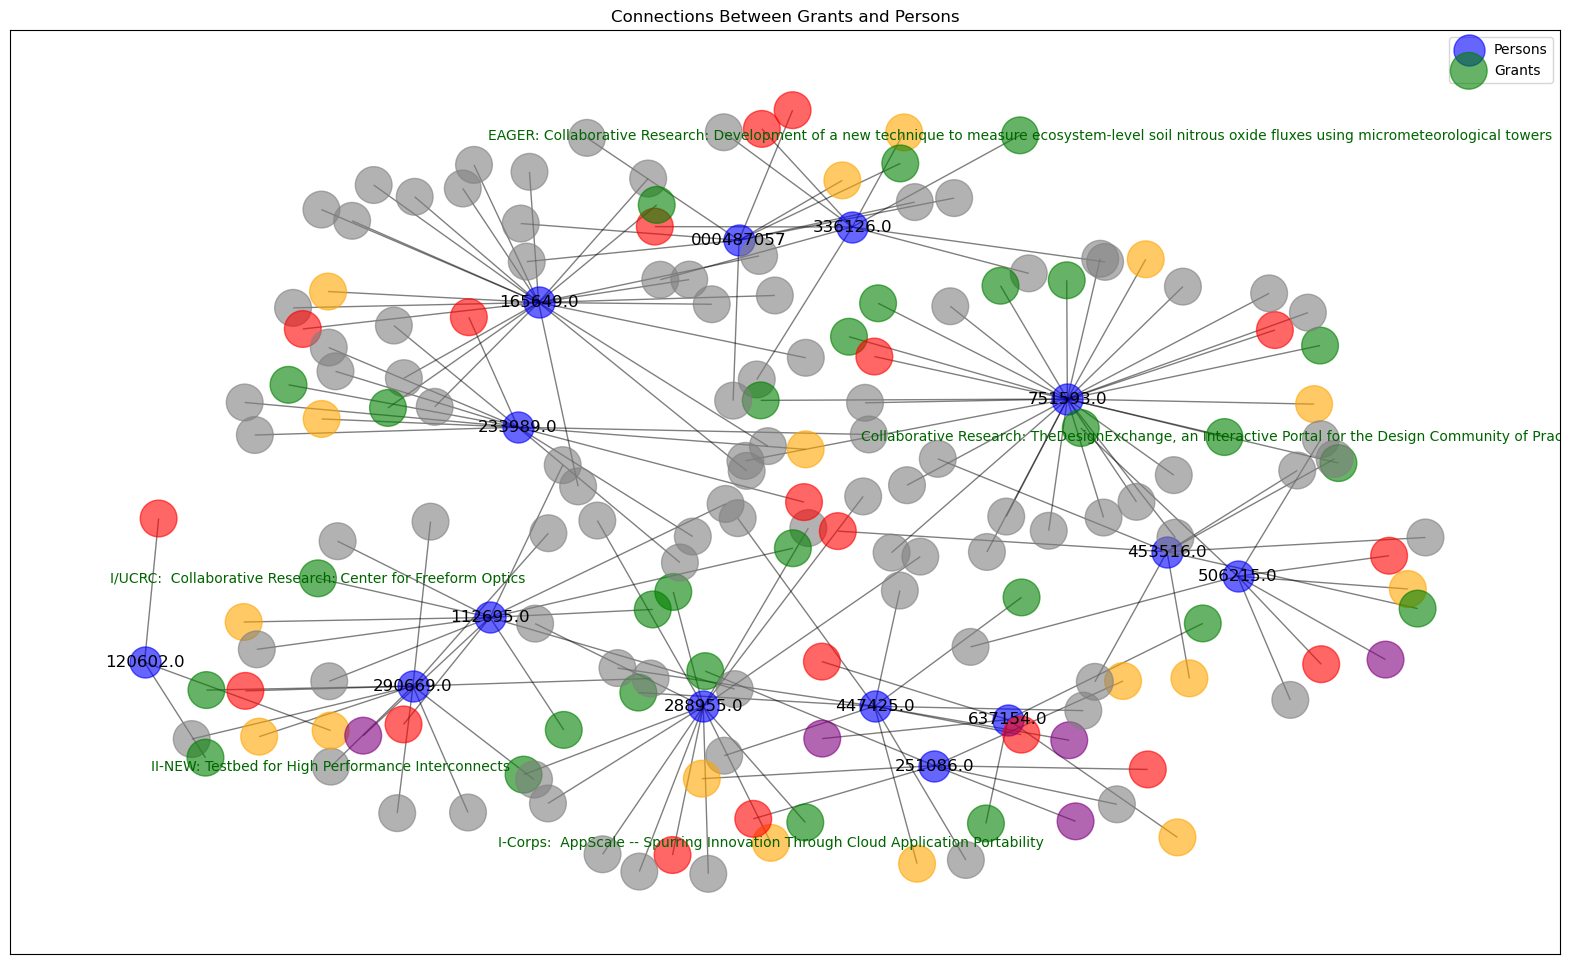

In [18]:
G = nx.Graph()

# Add nodes and edges
for _, row in filtered_df.iterrows():
    person_node = row['Investigator_NSFID']
    grant_node = row['AwardID']
    
    # Add nodes
    G.add_node(person_node, type='person', label=person_node)
    G.add_node(grant_node, type='grant', label=row['AwardTitle'], grant_type=row['GrantType'])
    
    # Add edge
    G.add_edge(person_node, grant_node)

# Draw the graph with better layout
pos = nx.spring_layout(G, k=0.3)  # Adjust the value of 'k' for better spacing
plt.figure(figsize=(20, 12))  # Increase figure size for better readability

person_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'person']
grant_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'grant']

grant_colors = {
    'Research': 'green',
    'I-Corps': 'orange',
    'SBIR': 'red',
    'STTR': 'purple',
    'Other': 'gray',
    'Unknown': 'black'
}

node_colors = [grant_colors[G.nodes[n].get('grant_type', 'Other')] if G.nodes[n]['type'] == 'grant' else 'blue' for n in G.nodes]

nx.draw_networkx_nodes(G, pos, nodelist=person_nodes, node_color='blue', node_size=500, alpha=0.6, label='Persons')
nx.draw_networkx_nodes(G, pos, nodelist=grant_nodes, node_color=[grant_colors[G.nodes[n]['grant_type']] for n in grant_nodes], node_size=700, alpha=0.6, label='Grants')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Only show labels for persons and a few grant labels for clarity
person_labels = {n: G.nodes[n]['label'] for n in person_nodes}
grant_labels = {n: G.nodes[n]['label'] for n in grant_nodes[:5]}  # Show only first 5 grant labels
nx.draw_networkx_labels(G, pos, labels=person_labels, font_size=12, font_color='black')
nx.draw_networkx_labels(G, pos, labels=grant_labels, font_size=10, font_color='darkgreen')

plt.legend(scatterpoints=1)
plt.title("Connections Between Grants and Persons")
plt.show()

In [19]:
# Filter the DataFrame to include only Research and I-Corps grants
research_icorps_df = df[df['GrantType'].isin(['Research', 'I-Corps'])]

In [20]:
# Group by Investigator_NSFID and aggregate the GrantTypes
grant_summary = research_icorps_df.groupby('Investigator_NSFID')['GrantType'].apply(lambda x: ','.join(sorted(set(x))))

In [21]:
investigators_with_both = grant_summary[grant_summary.str.contains('Research') & grant_summary.str.contains('I-Corps')].index

In [22]:
# Count the number of unique investigators
num_investigators_with_both = len(investigators_with_both)

print(f"Number of investigators who have moved from Research to I-Corps: {num_investigators_with_both}")

Number of investigators who have moved from Research to I-Corps: 920


In [23]:
investigators_df = research_icorps_df[research_icorps_df['Investigator_NSFID'].isin(investigators_with_both)]

In [24]:
investigators_df

,AwardID,InvestigatorNumber,Directorate_Abbreviation,CFDA_NUM,Institution_Phone,Institution_OrgUEINum,Division_LongName,AwardInstrument,Appropriation_Name,ProgramElement2_Code,Organization_Code,Institution_City,Appropriation_Code,ProgramOfficer_Name,Institution_State,Performance_Institution_CountryCode,MinAmdLetterDate,AwardAmount,Institution_CongressDistrictOrg,Agency,Year,Division_Abbreviation,Institution_OrgLglBusName,Institution_Country,Performance_Institution_CongressDistrictPerf,Institution_CongressDistrict,ProgramOfficer_Email,Performance_Institution_City,ProgramElement1_Code,ProgramElement3_Code,TRAN_TYPE,Performance_Institution_StreetAddress,AwardTotalIntnAmount,ProgramReference_Text,NSF_PAR_USE_FLAG,AwardExpirationDate,ARRAAmount,Appropriation_SymbolID,Performance_Institution_State,Fund_Obligation,AbstractNarration,Institution_Name,Fund_Name,Institution_StreetAddress2,ProgramElement1_Text,ProgramReference_Code,Performance_Institution_CountryFlag,AwardEffectiveDate,AwardTitle,MaxAmdLetterDate,Performance_Institution_Name,FUND_AGCY_CODE,Directorate_LongName,ProgramElement2_Text,Institution_StreetAddress1,ProgramOfficer_Phone,ProgramElement3_Text,Fund_Code,Performance_Institution_CongressDistrict,Fund_SymbolID,Performance_Institution_Zip,Institution_Zip,AWDG_AGCY_CODE,Performance_Institution_Country,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode,GrantType
54,1343083,1,TIP,47.041,5852754031.0,F27KDXZMF9Y8,Translational Impacts,Standard Grant,NSF RESEARCH & RELATED ACTIVIT,NaN,15030000.0,ROCHESTER,0113,Rathindra DasGupta,New York,US,06/25/2013,50000.0,NY25,NSF,2013,TI,UNIVERSITY OF ROCHESTER,United States,NY25,25.0,NaN,NaN,802300,NaN,Grant,NaN,50000.0,NaN,0.0,08/31/2014,NaN,40100.0,New York,2013~50000,The project will use a coating method that res...,University of Rochester,NSF RESEARCH & RELATED ACTIVIT,STE 200,I-Corps,NaN,1.0,07/01/2013,I-Corps: Electrically Polarized Hydroxyapatit...,06/25/2013,University of Rochester,4900.0,"Dir for Tech, Innovation, & Partnerships",NaN,910 GENESEE ST,NaN,NaN,01001314DB,25.0,40100.0,146270140,146113847,4900.0,United States,Matthew,Yates,Z,NaN,Matthew Z Yates,myates@che.rochester.edu,358125.0,06/25/2013,NaN,Principal Investigator,I-Corps
103,1357551,1,TIP,47.041,9798626777.0,QD1MX6N5YTN4,Translational Impacts,Standard Grant,NSF RESEARCH & RELATED ACTIVIT,NaN,15030000.0,COLLEGE STATION,0114,Rathindra DasGupta,Texas,US,11/20/2013,50000.0,TX10,NSF,2013,TI,TEXAS A&M ENGINEERING EXPERIMENT STATION,United States,TX10,10.0,NaN,College Station,8023,NaN,Grant,NaN,50000.0,NaN,0.0,05/31/2015,NaN,40100.0,Texas,2014~50000,As technology advances toward devices that dem...,Texas A&M Engineering Experiment Station,NSF RESEARCH & RELATED ACTIVIT,NaN,I-Corps,NaN,1.0,12/01/2013,I-Corps: Tailored Thermal Expansion Alloys,11/20/2013,Texas Engineering Experiment Station,4900.0,"Dir for Tech, Innovation, & Partnerships",NaN,3124 TAMU,NaN,NaN,01001415DB,10.0,40100.0,778454645,778433124,4900.0,United States,Raymundo,Arroyave,NaN,NaN,Raymundo Arroyave,rarroyave@tamu.edu,95307.0,11/20/2013,NaN,Principal Investigator,I-Corps
140,1319602,1,CSE,47.070,5173555040.0,R28EKN92ZTZ9,Div Of Information & Intelligent Systems,Continuing Grant,NSF RESEARCH & RELATED ACTIVIT,NaN,5020000.0,EAST LANSING,0113,Reid Simmons,Michigan,US,08/08/2013,257315.0,MI07,NSF,2013,IIS,MICHIGAN STATE UNIVERSITY,United States,MI07,7.0,NaN,NaN,7495,NaN,Grant,NaN,257315.0,ROBUST INTELLIGENCE,0.0,07/31/2017,NaN,40100.0,Michigan,2013~75691,Monitoring and understanding aquatic environme...,Michigan State University,NSF RESEARCH & RELATED ACTIVIT,NaN,Robust Intelligence,7495,1.0,08/01/2013,RI: Small: Collaborative Research: Bio-inspire...,06/29/2015,Michigan State University,4900.0,Direct For Computer & Info Scie & Enginr,NaN,426 AUDITORIUM RD RM 2,NaN,NaN,01001314DB,7.0,40100.0,488

In [25]:
investigators_df.to_csv("Research to I-Corps.csv")